In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, BatchNormalization, Dropout
from keras.datasets import mnist

In [2]:
(X_train, y_train),((x_test,y_test))= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:

model=Sequential()


model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))



model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
histroy=model.fit(X_train, y_train, epochs=10, batch_size=64 , validation_data=(x_test, y_test))

Epoch 1/10
938/938 [==============================] - 8s 6ms/step - loss: 2.7502 - accuracy: 0.8567 - val_loss: 0.5478 - val_accuracy: 0.8915
Epoch 2/10
938/938 [==============================] - 3s 4ms/step - loss: 0.4038 - accuracy: 0.9103 - val_loss: 0.4148 - val_accuracy: 0.9190
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2737 - accuracy: 0.9325 - val_loss: 0.3022 - val_accuracy: 0.9305
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2164 - accuracy: 0.9436 - val_loss: 0.2628 - val_accuracy: 0.9423
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1900 - accuracy: 0.9491 - val_loss: 0.2452 - val_accuracy: 0.9425
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.1800 - accuracy: 0.9514 - val_loss: 0.2310 - val_accuracy: 0.9448
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1687 - accuracy: 0.9558 - val_loss: 0.2372 - val_accuracy: 0.9458
Epoch 

In [6]:
loss = model.evaluate(x_test, y_test, verbose=0)
loss

[0.2197931706905365, 0.9517999887466431]

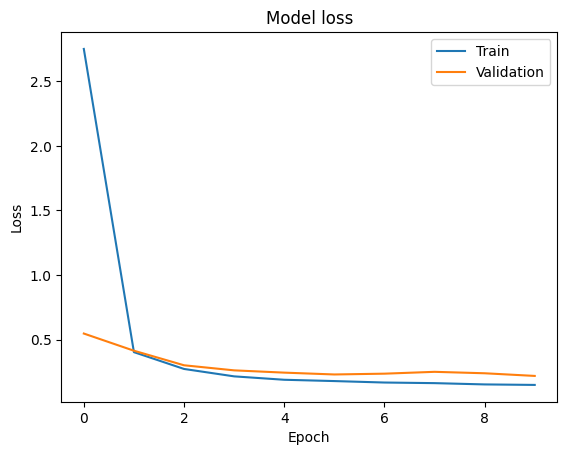

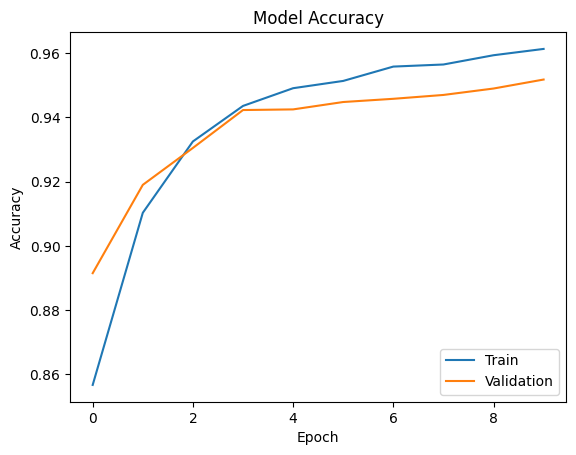

In [7]:
import matplotlib.pyplot as plt
plt.plot(histroy.history['loss'])
plt.plot(histroy.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# plot the accuracy of training and validation

# Plotting the training and validation accuracy
plt.plot(histroy.history['accuracy'])
plt.plot(histroy.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [8]:
model.save('mnist_model6.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
from keras.models import load_model
model = load_model('/content/mnist_model6.h5')

In [13]:
predictions = model.predict(x_test) # Get probabilities for each class
predicted_classes = np.argmax(predictions, axis=1) # Extract the class with highest probability

print(predicted_classes) # Print predicted classes

313/313 [==============================] - 1s 4ms/step
[7 2 1 ... 4 5 6]


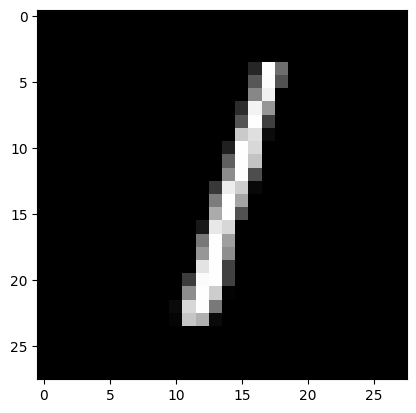

In [15]:
plt.imshow(x_test[2], cmap='gray')